In [21]:
#Exploring Various color spaces 
#GRAYSCALE
#HSV - Hue Saturation Value
#LAB - Luminosity A(green-red) B(yellow-Blue)
#threshold selection and canny edge detection alogrithm
#drawing contours and counting them


In [4]:
import cv2

image = cv2.imread("puppy.jpg")
(height,width,depth) = image.shape

cv2.namedWindow('Image', cv2.WINDOW_NORMAL)
cv2.imshow("Image", image)
cv2.waitKey(0)

# convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
cv2.namedWindow('Gray', cv2.WINDOW_NORMAL)
cv2.imshow("Gray", gray)
cv2.waitKey(0)


#converting to HSV colorspace
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) 
cv2.namedWindow('hsv', cv2.WINDOW_NORMAL)
#display converted HSV image
cv2.imshow("hsv", hsv)
cv2.waitKey(0)

#converting HSV image to Grayscale
hsv_gray=cv2.cvtColor(hsv, cv2.COLOR_BGR2GRAY)
cv2.namedWindow('hsv_gray', cv2.WINDOW_NORMAL)
#display converted HSV gray image
cv2.imshow('hsv_gray', hsv_gray)
cv2.waitKey(0)

cv2.destroyAllWindows()

In [6]:
#converting into high contrast image
import cv2

#-----Reading the image-----------------------------------------------------
img = cv2.imread('puppy.jpg', 1)
cv2.imshow("img",img) 
cv2.waitKey(0)
#-----Converting image to LAB Color model----------------------------------- 
lab= cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
cv2.imshow("lab",lab)
cv2.waitKey(0)
#-----Splitting the LAB image to different channels-------------------------
l, a, b = cv2.split(lab)
cv2.imshow('l_channel', l)
cv2.imshow('a_channel', a)
cv2.imshow('b_channel', b)
cv2.waitKey(0)

#-----Applying CLAHE to L-channel-------------------------------------------
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
cl = clahe.apply(l)
cv2.imshow('CLAHE output', cl)
cv2.waitKey(0)

#-----Merge the CLAHE enhanced L-channel with the a and b channel-----------
limg = cv2.merge((cl,a,b))
cv2.imshow('limg', limg)
cv2.waitKey(0)

#-----Converting image from LAB Color model to RGB model--------------------
high_contrast = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

In [7]:
cv2.imshow("high_contrast", high_contrast)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
high_gray = cv2.cvtColor(high_contrast, cv2.COLOR_BGR2GRAY) 

cv2.namedWindow('High Contrast Gray', cv2.WINDOW_NORMAL)
cv2.imshow("High Contrast Gray", high_gray)
cv2.waitKey(0)
#writing to file
cv2.destroyAllWindows() 

In [11]:
#applying gaussian blur on gray
# apply a Gaussian blur with a 11x11 kernel to the image to smooth it,
# useful when reducing high frequency noise
blurred_gray = cv2.GaussianBlur(gray, (13,13), 0)
cv2.imshow("Blurred Gray", blurred_gray)

H_blurred_gray = cv2.GaussianBlur(high_gray, (15,15), 0)
cv2.imshow("High contrast Blurred Gray", H_blurred_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()



In [27]:
#The Canny edge detector is an edge detection operator 
#that uses a multi-stage algorithm to detect a wide range of edges in images.
#It was developed by John F. Canny in 1986. Canny also produced a computational theory of edge detection
#explaining why the technique works. 

#Canny algorithm works best on gray scale. It takes four inputs:
#Grayscale image
#min threshold
#max threshold
#aperture size where default is 3

In [15]:
edged = cv2.Canny(hsv_gray, 40, 70, 3)
cv2.namedWindow('Edged', cv2.WINDOW_NORMAL)
cv2.imshow("Edged", edged)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [14]:
edged_2 = cv2.Canny(blurred_gray, 10, 70, 3)
cv2.namedWindow('Edged', cv2.WINDOW_NORMAL)
cv2.imshow("Edged", edged)
cv2.waitKey(0)
cv2.destroyAllWindows()

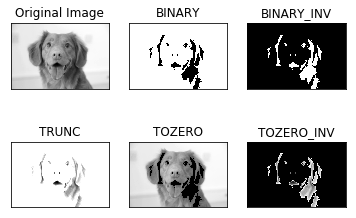

In [18]:
#threshold the image by setting all pixel values less than 225 to 255 (white; foreground) and all pixel values >= 170 to 255
#(black; background), thereby segmenting the image
thresh = cv2.threshold(blurred_gray, 70,255, cv2.THRESH_BINARY_INV)[1]
cv2.namedWindow('Thresh', cv2.WINDOW_NORMAL)
cv2.imshow("Thresh", thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()
lower_threshold=80
# try various thresholds
#cv2.THRESH_BINARY
#cv2.THRESH_BINARY_INV
#cv2.THRESH_TRUNC
#cv2.THRESH_TOZERO
#cv2.THRESH_TOZERO_INV
ret,thresh1 = cv2.threshold(blurred_gray,80,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(blurred_gray,80,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(blurred_gray,80,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(blurred_gray,80,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(blurred_gray,80,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [blurred_gray, thresh1, thresh2, thresh3, thresh4, thresh5]
from matplotlib import pyplot as plt
for i in range(0,6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()



In [19]:
# find contours (i.e., outlines) of the foreground objects in the
# thresholded image
import imutils
cnts = cv2.findContours(edged_2.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts )
output = image.copy()
 
#loop over the contours
for c in cnts:
    # draw each contour on the output image with a 3px thick purple
    # outline, then display the output contours one at a time
    cv2.drawContours(output, [c], -1, (255, 0, 155), 3)
    cv2.imshow("Contours", output)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [20]:

# draw the total number of contours found in purple
text = "I found {} objects!".format(len(cnts))
cv2.putText(output, text, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0, 240, 159), 2)
cv2.imshow("Contours", output)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [21]:
# find contours (i.e., outlines) of the foreground objects in the
# thresholded image

contours,hierarchy = cv2.findContours(thresh.copy(),  cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
temp_x_lower=int(width/2)
temp_y_lower=int(height/2)
temp_x_higher=int(width/2)
temp_y_higher=int(height/2)
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    print(x,y,w,h)
    
    if temp_x_higher+w  < (x+w):
        temp_x_higher =int(x+w)
    if temp_y_higher+h  < (y+h):
        temp_y_higher= int(y+h)
        
    if temp_x_lower > int(x):
        temp_x_lower=int(x)
    if temp_y_lower > int(y): 
        temp_y_lower=int(y)

print("Lower X:",temp_x_lower,"Lower Y:",temp_y_lower,"Higher X:", temp_x_higher,"Higher Y:",temp_y_higher) 
    
bb_img = cv2.rectangle(image,(temp_x_lower,temp_y_lower),(int(temp_x_higher),int(temp_y_higher)),(0,255,0),2)
cv2.imshow("Bounding Box",bb_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

710 598 77 136
652 487 1 4
588 465 31 61
363 448 5 13
460 438 116 63
618 436 33 48
653 411 13 19
725 356 52 110
528 344 24 27
475 344 16 22
234 334 14 26
232 297 20 22
229 272 29 22
778 260 49 132
664 255 6 8
778 247 4 6
418 234 23 26
605 223 48 51
404 223 28 15
583 178 184 482
315 142 79 332
Lower X: 229 Lower Y: 142 Higher X: 787 Higher Y: 734


In [53]:
#exercise 2
#change gaussian blur and utilize the various color spaces if you can get the right number of cars in carpark image. 
#Think of using other threshold if possible

In [23]:
import cv2
image = cv2.imread("carpark3.jpg")
(height,width,depth) = image.shape

cv2.namedWindow('Image', cv2.WINDOW_NORMAL)
cv2.imshow("Image", image)
cv2.waitKey(0)

# convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
cv2.namedWindow('Gray', cv2.WINDOW_NORMAL)
cv2.imshow("Gray", gray)
cv2.waitKey(0)


#converting to HSV colorspace
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) 
cv2.namedWindow('hsv', cv2.WINDOW_NORMAL)
#display converted HSV image
cv2.imshow("hsv", hsv)
cv2.waitKey(0)

#converting HSV image to Grayscale
hsv_gray=cv2.cvtColor(hsv, cv2.COLOR_BGR2GRAY)
cv2.namedWindow('hsv_gray', cv2.WINDOW_NORMAL)
#display converted HSV gray image
cv2.imshow('hsv_gray', hsv_gray)
cv2.waitKey(0)

cv2.destroyAllWindows()

In [24]:
#applying gaussian blur on gray
# apply a Gaussian blur with a 11x11 kernel to the image to smooth it,
# useful when reducing high frequency noise
blurred_gray = cv2.GaussianBlur(gray, (13,13), 0)
cv2.imshow("Blurred Gray", blurred_gray)

cv2.waitKey(0)
cv2.destroyAllWindows()


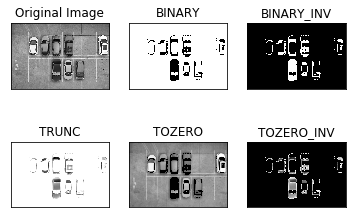

In [26]:
#threshold the image by setting all pixel values less than 225 to 255 (white; foreground) and all pixel values >= 170 to 255
#(black; background), thereby segmenting the image
temp_image=blurred_gray
thresh = cv2.threshold(temp_image, 70,255, cv2.THRESH_BINARY_INV)[1]
cv2.namedWindow('Thresh', cv2.WINDOW_NORMAL)
cv2.imshow("Thresh", thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()
lower_threshold=80
higher_threshold=255
# try various thresholds
#cv2.THRESH_BINARY
#cv2.THRESH_BINARY_INV
#cv2.THRESH_TRUNC
#cv2.THRESH_TOZERO
#cv2.THRESH_TOZERO_INV
ret,thresh1 = cv2.threshold(temp_image,lower_threshold,higher_threshold,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(temp_image,lower_threshold,higher_threshold,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(temp_image,lower_threshold,higher_threshold,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(temp_image,lower_threshold,higher_threshold,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(temp_image,lower_threshold,higher_threshold,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [gray, thresh1, thresh2, thresh3, thresh4, thresh5]
from matplotlib import pyplot as plt
for i in range(0,6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()
